<a href="https://colab.research.google.com/github/MekhzZ/opencv_bootcamp_exercise/blob/main/02_Basic_Manipulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing required libraries

import os
import cv2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from zipfile import ZipFile
from urllib.request import urlretrieve

from IPython.display import Image

%matplotlib inline
# matplotlib jupyter support

In [ ]:
# it's always good practice to print the library versions for any future use

import sys
print("python", sys.version)
print("cv2 version:", cv2.__version__)
print("numpy version:", np.__version__)
print("matplotlib version:", matplotlib.__version__)
print("os version:", os.name)
print("zipfile version:", ZipFile.__name__)


python 3.11.11 (main, Dec  4 2024, 08:55:07) [GCC 11.4.0]
cv2 version: 4.11.0
numpy version: 2.0.2
matplotlib version: 3.10.0
os version: posix
zipfile version: ZipFile


In [ ]:
def download_and_unzip(url, save_path):
    print(f"Downloading and extracting assests....", end="")

    # Downloading zip file using urllib package.
    urlretrieve(url, save_path)

    try:
        # Extracting zip file using the zipfile package.
        with ZipFile(save_path) as z:
            # Extract ZIP file contents in the same directory.
            z.extractall(os.path.split(save_path)[0])

        print("Done")

    except Exception as e:
        print("\nInvalid file.", e)

In [ ]:
# downloading assets
URL = r"https://www.dropbox.com/s/rys6f1vprily2bg/opencv_bootcamp_assets_NB2.zip?dl=1"

asset_zip_path = os.path.join(os.getcwd(), "opencv_bootcamp_assets_NB2.zip")

# Download if assest ZIP does not exists.
if not os.path.exists(asset_zip_path):
    download_and_unzip(URL, asset_zip_path)

[[  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0

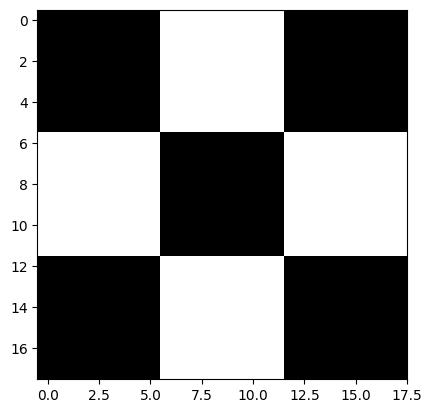

In [ ]:
# reading image in grayscale
cb_img = cv2.imread('/content/checkerboard_18x18.png',0)

plt.imshow(cb_img, cmap='gray')
print(cb_img)

In [ ]:
# accessing individual pixels
# just need to give coordinates

print(cb_img[0,0])
print(cb_img[0,6])

0
255


In [ ]:
# modifying pixel
cb_img_copy = cb_img.copy()
cb_img_copy[0,0] = 255

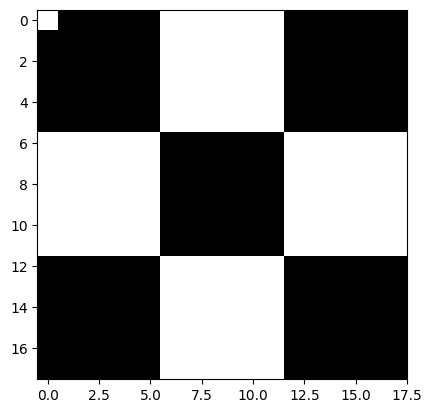

In [ ]:
plt.imshow(cb_img_copy, cmap='gray')

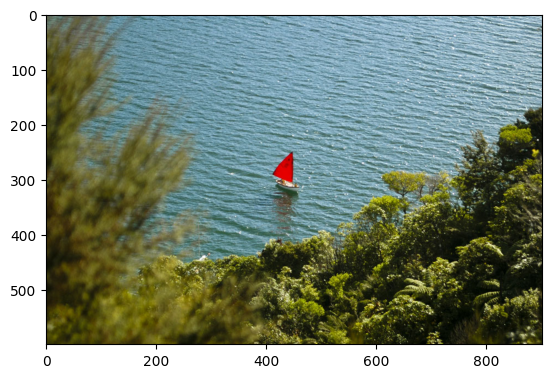

In [ ]:
# cropping image
# let's read image first,

img_NZ_bgr = cv2.imread('/content/New_Zealand_Boat.jpg')
img_NZ_rgb = cv2.cvtColor(img_NZ_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_NZ_rgb)

In [ ]:
img_NZ_rgb.shape

(600, 903, 3)

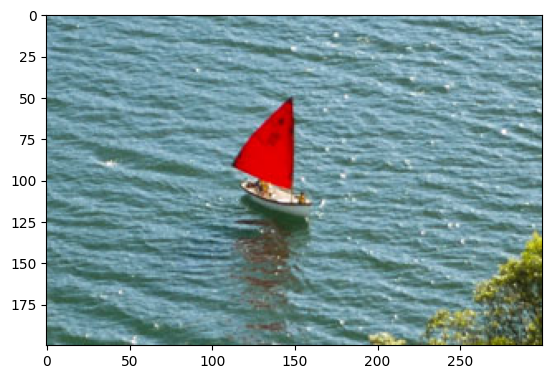

In [ ]:
cropped_img = img_NZ_rgb[200:400, 300:600]
plt.imshow(cropped_img)

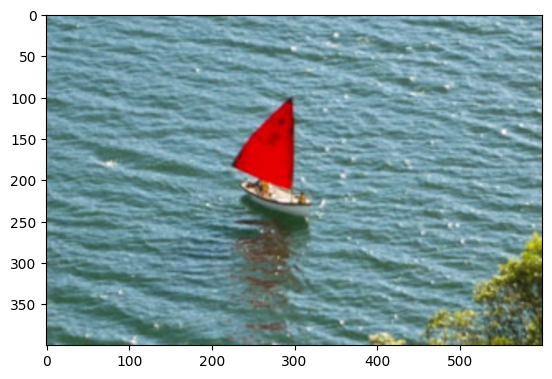

In [ ]:
# resizing image method_1
resized_cropped_img_2x = cv2.resize(cropped_img, None, fx=2, fy=2)
plt.imshow(resized_cropped_img_2x)

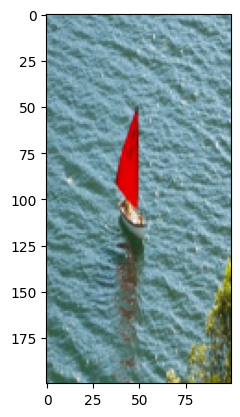

In [ ]:
# resizing image method_2

desired_height = 200
desired_width = 100
resized_cropped_img = cv2.resize(cropped_img, (desired_width, desired_height), interpolation=cv2.INTER_AREA)
plt.imshow(resized_cropped_img)

In [ ]:
cropped_img.shape

(200, 300, 3)

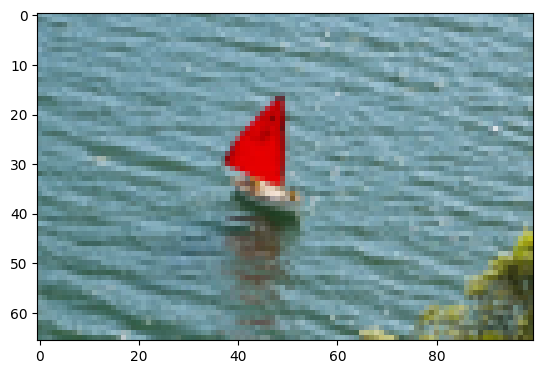

In [ ]:
# resizing while maintaing aspect ratio

desired_width = 100
aspect_ratio = desired_width / cropped_img.shape[1]
desired_height = int(cropped_img.shape[0] * aspect_ratio)
dim = (desired_width, desired_height)

resized_cropped_img = cv2.resize(cropped_img, dim, interpolation=cv2.INTER_AREA)
plt.imshow(resized_cropped_img)

In [ ]:
resized_cropped_img.shape

(66, 100, 3)

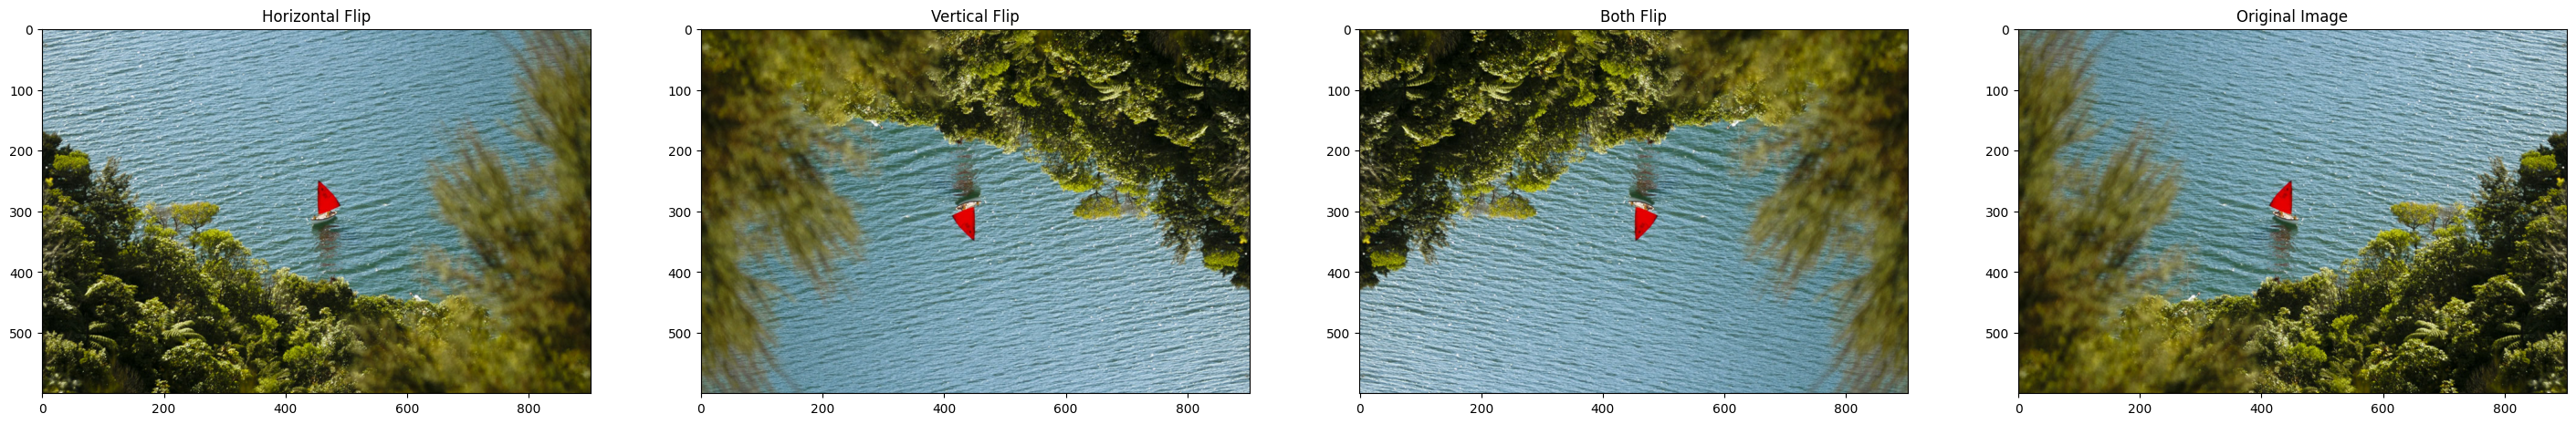

In [ ]:
# flipping images

flipped_horz = cv2.flip(img_NZ_rgb, 1)
flipped_ver = cv2.flip(img_NZ_rgb, 0)
flipped_both = cv2.flip(img_NZ_rgb, -1)

plt.figure(figsize=[45,10])
plt.subplot(151);plt.imshow(flipped_horz);plt.title('Horizontal Flip')
plt.subplot(152);plt.imshow(flipped_ver);plt.title('Vertical Flip')
plt.subplot(153);plt.imshow(flipped_both);plt.title('Both Flip')
plt.subplot(154);plt.imshow(img_NZ_rgb);plt.title('Original Image')
plt.show()